Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading in data

In [2]:
df = pd.read_csv("USUnemploymentClaims.csv")

In [3]:
df.head()

,Report Date,Claims,Change
0,12/28/2019,223000,-2000
1,1/4/2020,214000,-9000
2,1/11/2020,205000,-9000
3,1/18/2020,223000,18000
4,1/25/2020,217000,-6000


In [4]:
df

,Report Date,Claims,Change
0,12/28/2019,223000,-2000
1,1/4/2020,214000,-9000
2,1/11/2020,205000,-9000
3,1/18/2020,223000,18000
4,1/25/2020,217000,-6000
5,2/1/2020,203000,-14000
6,2/8/2020,206000,3000
7,2/15/2020,211000,5000
8,2/22/2020,219000,8000
9,2/29/2020,215000,-4000


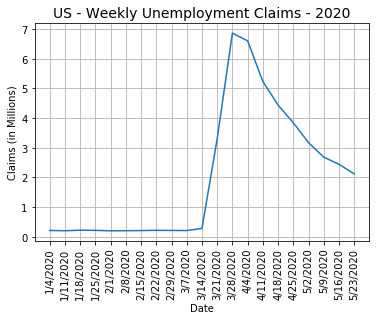

In [5]:
import matplotlib as mpl

#df['Report Date'] = df['Report Date'].str.slice(0, -5)
#print(df['Report Date'][0])

df['ClaimsMil'] = df['Claims']/1000000


plt.plot(df['Report Date'][1:],df['ClaimsMil'][1:])
plt.title("US - Weekly Unemployment Claims - 2020",fontsize=14)
plt.xlabel("Date")

plt.xticks(rotation=90)

plt.ylabel("Claims (in Millions)")
plt.grid()


Text(0, 0.5, 'Claims (in Millions)')

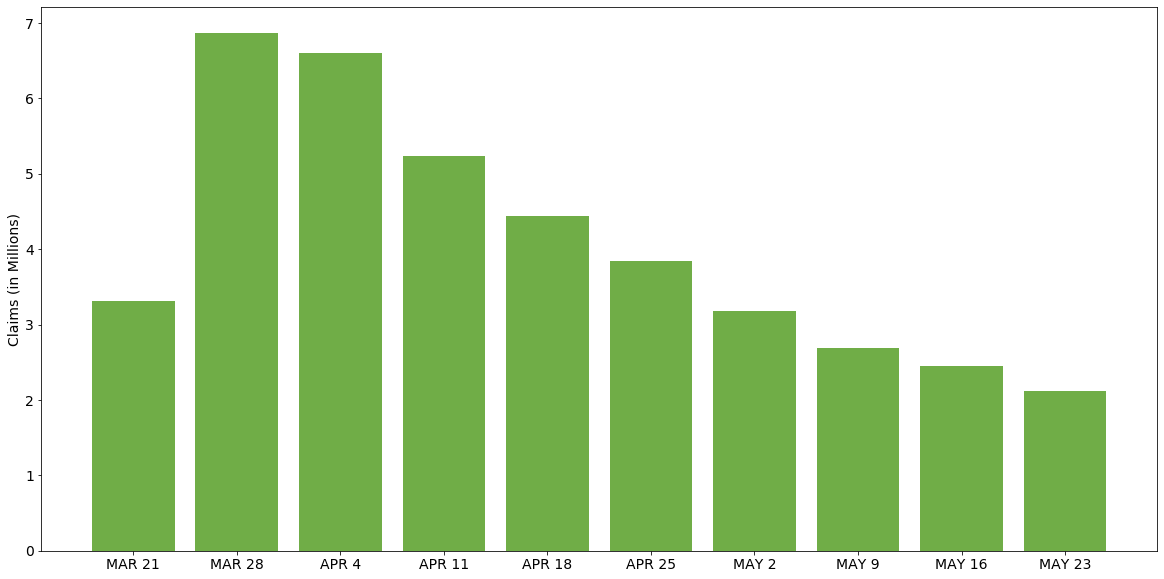

In [13]:
#df['Report Date'] = df['Report Date'].str.slice(0, -5)
#print(df['Report Date'][0])

df['ClaimsMil'] = df['Claims']/1000000

plt.figure(figsize=(20,10))

plt.bar(df['Report Date'][12:],df['ClaimsMil'][12:],color='#70AD47')
#plt.title("US - Weekly Unemployment Claims - 2020",fontsize=14)
#plt.xlabel("Date")

labels = ['MAR 21', 'MAR 28', 'APR 4', 'APR 11', 'APR 18', 'APR 25', 'MAY 2', 'MAY 9','MAY 16','MAY 23']
plt.xticks(range(len(labels)), labels)
#plt.xticks(rotation=45)
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)
plt.ylabel("Claims (in Millions)", fontsize=14)


Text(0, 0.5, 'Claims')

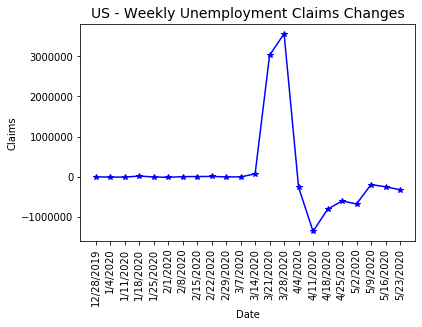

In [7]:
plt.plot(df['Report Date'],df['Change'],'*-b')
plt.title("US - Weekly Unemployment Claims Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Claims")

In [8]:
percentage = [0]
for i in range(1,len(df),1):
#for i in range(1,5,1):
    j = i-1
    delta = (df['Claims'][i]-df['Claims'][j])/(df['Claims'][j])
    delta = round(delta * 100,2)
    #print(round(delta,2))
    percentage.append(delta)
    
df['Percentage'] = percentage

df

,Report Date,Claims,Change,ClaimsMil,Percentage
0,12/28/2019,223000,-2000,0.223,0.00
1,1/4/2020,214000,-9000,0.214,-4.04
2,1/11/2020,205000,-9000,0.205,-4.21
3,1/18/2020,223000,18000,0.223,8.78
4,1/25/2020,217000,-6000,0.217,-2.69
5,2/1/2020,203000,-14000,0.203,-6.45
6,2/8/2020,206000,3000,0.206,1.48
7,2/15/2020,211000,5000,0.211,2.43
8,2/22/2020,219000,8000,0.219,3.79
9,2/29/2020,215000,-4000,0.215,-1.83


Text(0, 0.5, 'Percentage(%)')

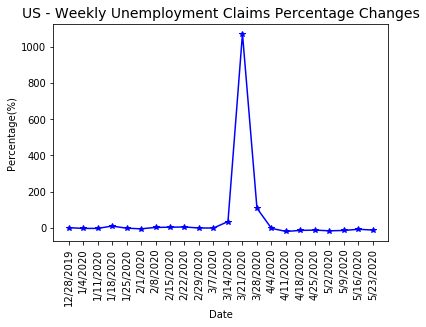

In [9]:
plt.plot(df['Report Date'],df['Percentage'],'*-b')
plt.title("US - Weekly Unemployment Claims Percentage Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Percentage(%)")

In [24]:
totalClaimsCovid19 = df['Claims'][11:].sum()
print("Total unemployment claims since COVID-19 outbreak and Shelter in Place in mid-March: {:,}".format(totalClaimsCovid19))

Total unemployment claims since COVID-19 outbreak and Shelter in Place in mid-March: 41,019,000


In [11]:
running_total = []
for i in range(len(df)+1):
    #print(i)
    if df['Claims'][2:i].sum() != 0:
        running_total.append(df['Claims'][2:i].sum())
    
print(running_total)
print(len(running_total))
print(df['Claims'][0:1].sum())


[205000, 428000, 645000, 848000, 1054000, 1265000, 1484000, 1699000, 1910000, 2192000, 5499000, 12366000, 18972000, 24209000, 28651000, 32497000, 35673000, 38360000, 40806000, 42929000]
20
223000


In [14]:
labels = ['JAN 11','JAN 18','JAN 25','FEB 1','FEB 8','FEB 15','FEB 22','FEB 29','MAR 7','MAR 14','MAR 21', 'MAR 28', 'APR 4', 'APR 11', 'APR 18', 'APR 25', 'MAY 2', 'MAY 9','MAY 16','MAY 23']

df_running_total = pd.DataFrame({'Claims':running_total,'Dates':labels})
df_running_total

,Claims,Dates
0,205000,JAN 11
1,428000,JAN 18
2,645000,JAN 25
3,848000,FEB 1
4,1054000,FEB 8
5,1265000,FEB 15
6,1484000,FEB 22
7,1699000,FEB 29
8,1910000,MAR 7
9,2192000,MAR 14


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

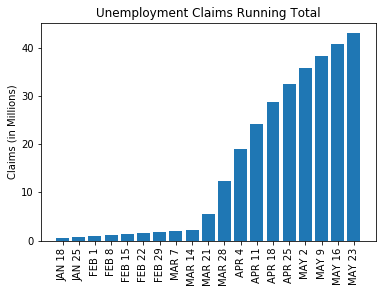

In [21]:
start = 1
plt.bar(df_running_total['Dates'][start:],(df_running_total['Claims'][start:]/1000000))
plt.title("Unemployment Claims Running Total")
plt.ylabel("Claims (in Millions)")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

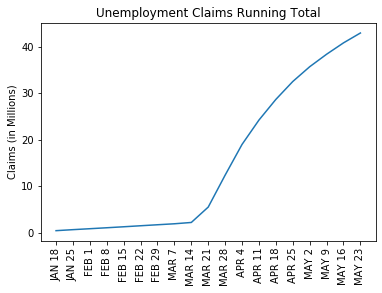

In [20]:
start = 1
plt.plot(df_running_total['Dates'][start:],(df_running_total['Claims'][start:]/1000000))
plt.title("Unemployment Claims Running Total")
plt.ylabel("Claims (in Millions)")
plt.xticks(rotation=90)